# RNA-seqカウントデータの前処理・正規化を行う

In [38]:
# pandasのインポート
import pandas as pd
import numpy as np

In [39]:
count_file = "input/counts.txt"
gene_id_product_file = "gene_id_product.tsv"

* カウントデータファイルの読み込み
```
# Program:featureCounts v1.6.2; Command:"../tools/subread-1.6.2-Linux-x86_64/bin/featureCounts" "-p" "-T" "8" "-t" "exon" "-g" "gene_id" "-a" "../reference/s288c_e.gff" "-o" "../featurecount/counts.txt" "SRR453566.sorted.bam" "SRR453567.sorted.bam" "SRR453568.sorted.bam" "SRR453569.sorted.bam" "SRR453570.sorted.bam" "SRR453571.sorted.bam" 
Geneid  Chr     Start   End     Strand  Length  SRR453566.sorted.bam    SRR453567.sorted.bam    SRR453568.sorted.bam    SRR453569.sorted.bam    SRR453570.sorted.bam    SRR453571.sorted.bam
gene_0001       NC_001133.9     1807    2169    -       363     1       3       2       0       0       1
gene_0002       NC_001133.9     2480    2707    +       228     0       0       0       0       0       0
gene_0003       NC_001133.9     7235    9016    -       1782    0       0       0       0       0       0
gene_0004... 以下省略
```
1行目はfeatureCountsの実行条件が記載されているだけなので無視。二行目は列タイトルを表すヘッダー行。  
3行目以降からデータ行となっている。一番左の列が遺伝子idになっているのでこれをindexに用いる。

pd.read_tableメソッドのskiprows、index_col、header オプションを指定して読み込む
```
skiprows : list-like or integer or callable, default None
    Line numbers to skip (0-indexed) or number of lines to skip (int)
    at the start of the file.

    If callable, the callable function will be evaluated against the row
    indices, returning True if the row should be skipped and False otherwise.
    An example of a valid callable argument would be ``lambda x: x in [0, 2]``.
    
index_col : int or sequence or False, default None
    Column to use as the row labels of the DataFrame. If a sequence is given, a
    MultiIndex is used. If you have a malformed file with delimiters at the end
    of each line, you might consider index_col=False to force pandas to _not_
    use the first column as the index (row names)
    
header : int or list of ints, default 'infer'
    Row number(s) to use as the column names, and the start of the data.
    Default behavior is as if set to 0 if no ``names`` passed, otherwise
    ``None``. Explicitly pass ``header=0`` to be able to replace existing
    names. The header can be a list of integers that specify row locations for
    a multi-index on the columns e.g. [0,1,3]. Intervening rows that are not
    specified will be skipped (e.g. 2 in this example is skipped). Note that
    this parameter ignores commented lines and empty lines if
    ``skip_blank_lines=True``, so header=0 denotes the first line of data
    rather than the first line of the file.
```

In [40]:
df = pd.read_table(count_file, index_col=0, skiprows=1) 
# pd.read_table(count_file, index_col=0, header=1)  でも同じ結果になった。

In [41]:
df

,Chr,Start,End,Strand,Length,SRR453566.sorted.bam,SRR453567.sorted.bam,SRR453568.sorted.bam,SRR453569.sorted.bam,SRR453570.sorted.bam,SRR453571.sorted.bam
Geneid,,,,,,,,,,,
gene_0001,NC_001133.9,1807,2169,-,363,1,3,2,0,0,1
gene_0002,NC_001133.9,2480,2707,+,228,0,0,0,0,0,0
gene_0003,NC_001133.9,7235,9016,-,1782,0,0,0,0,0,0
gene_0004,NC_001133.9,11565,11951,-,387,0,1,0,0,0,0
gene_0005,NC_001133.9,12046,12426,+,381,4,8,9,8,6,15
gene_0006,NC_001133.9,13363,13743,-,381,0,0,0,0,0,0
gene_0007,NC_001133.9,21566,21850,+,285,0,0,0,0,0,0
gene_0008,NC_001133.9,22395,22685,-,291,0,0,0,0,0,0
gene_0009,NC_001133.9,24000,27968,-,3969,29,36,29,43,58,79


* gene_idとproductの一覧ファイルを読み込む
```
gene_0001	seripauperin PAU8
gene_0002	hypothetical protein
gene_0003	putative permease SEO1
gene_0004	hypothetical protein
gene_0005	hypothetical protein
gene_0006	Tda8p
gene_0007...
```
ヘッダー行がないので、
namesオプションを指定して読み込む
```
names : array-like, default None
    List of column names to use. If file contains no header row, then you
    should explicitly pass header=None. Duplicates in this list are not
    allowed unless mangle_dupe_cols=True, which is the default.
```


In [44]:
df.sum()

Chr                     NC_001133.9NC_001133.9NC_001133.9NC_001133.9NC...
Start                   1807248072351156512046133632156622395240003156...
End                     2169270790161195112426137432185022685279683294...
Strand                  -+--+-+--+++++++-++----+--++--+-+-++-+--+;+-++...
Length                                                            8886852
SRR453566.sorted.bam                                              4849336
SRR453567.sorted.bam                                              6534206
SRR453568.sorted.bam                                              4787014
SRR453569.sorted.bam                                              3265038
SRR453570.sorted.bam                                              4050601
SRR453571.sorted.bam                                              5123562
dtype: object

In [28]:
gene_products = pd.read_table(gene_id_product_file, index_col=0, names=["gene_id", "product"])

In [29]:
gene_products

,product
gene_id,
gene_0001,seripauperin PAU8
gene_0002,hypothetical protein
gene_0003,putative permease SEO1
gene_0004,hypothetical protein
gene_0005,hypothetical protein
gene_0006,Tda8p
gene_0007,hypothetical protein
gene_0008,hypothetical protein
gene_0009,flocculin FLO9


In [30]:
# counts.txtにはミトコンドリア上の遺伝子も含まれるのでこれを除く (Chrの名称が NC_001224.1 がミトコンドリアに該当)
df = df[df.Chr != "NC_001224.1"]

In [31]:
# 二つのデータフレームを連結する
# gene_products には mRNA のデータしか含まれていないので、rRNA などのデータはこの時点で除かれる。
# ミトコンドリア遺伝子もgene_productsに含まれているので、上の操作は本当は不要。
df = gene_products.join(df)
# gene_products.merge(df, left_index=True, right_index=True) でも同じ結果が得られる

In [17]:
# 列名を変更するための対応表
names = {'SRR453566.sorted.bam': 'batch_1',
         'SRR453567.sorted.bam': 'batch_2',
         'SRR453568.sorted.bam': 'batch_3',
         'SRR453569.sorted.bam': 'chemostat_1',
         'SRR453570.sorted.bam': 'chemostat_2',
         'SRR453571.sorted.bam': 'chemostat_3'}

In [22]:
# rename_axisをaxis=1を適用して使い、列名を変更する
df = df.rename_axis(mapper=names, axis=1)

# rename_axisを使わなくても、既存の列を別名でコピーした後で元の列を削除、という方法でも可能
# df["batch_1"] = df['SRR453566.sorted.bam']
# del df['SRR453566.sorted.bam']

In [397]:
df.head()

,product,Chr,Start,End,Strand,Length,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
gene_id,,,,,,,,,,,,
gene_0001,seripauperin PAU8,NC_001133.9,1807,2169,-,363,1,3,2,0,0,1
gene_0002,hypothetical protein,NC_001133.9,2480,2707,+,228,0,0,0,0,0,0
gene_0003,putative permease SEO1,NC_001133.9,7235,9016,-,1782,0,0,0,0,0,0
gene_0004,hypothetical protein,NC_001133.9,11565,11951,-,387,0,1,0,0,0,0
gene_0005,hypothetical protein,NC_001133.9,12046,12426,+,381,4,8,9,8,6,15


In [398]:
# raw カウントのデータを保存する
df.iloc[:, 6:12].to_csv("count_raw.tsv", sep="\t")

# リード数で正規化 (100万リードあたりのカウント数に揃える, RPM)


In [399]:
#いったん別のデータフレームとしてコピーしておく
df2 = df.copy()

In [400]:
# 合計リード数を100万に揃える関数
def normalize_by_read(S):
    total = sum(S)
    S = S * 10**6 / total
    return S


In [401]:
# ためしに一つの列に適用してみる。
normalize_by_read(df2["batch_1"]).sum()

1000000.0

In [402]:
# applyを用いて列ごとに関数を適用する (axis=0)
df2.iloc[:, 6:12] = df2.iloc[:, 6:12].apply(normalize_by_read, axis=0)

In [403]:
#　合計が100万となっていることを確認
df2.iloc[:, 6:12].sum()

batch_1        1000000.0
batch_2        1000000.0
batch_3        1000000.0
chemostat_1    1000000.0
chemostat_2    1000000.0
chemostat_3    1000000.0
dtype: float64

In [404]:
# 保存する (count数の部分のみ)
df2.iloc[:, 6:12].to_csv("count_fpm.tsv", sep="\t")

# さらに長さで割ってFPKMを算出する

FPKM = fragments per kilobase of exon per million reads mapped  
single-endの場合、RPKM = reads per kilobase of exon per million reads mapped と呼ばれるが、
FPKM/RPKMはほぼ同じ意味で用いられる


In [405]:
# df3としてコピーしておく
df3 = df2.copy()

In [406]:
def normalize_by_length(S):
    S[6:10] = S[6:10] * 10**3 / S["Length"]
    return S

In [407]:
fpkm = df3.apply(normalize_by_length, axis=1)

In [408]:
fpkm.head(1)

,product,Chr,Start,End,Strand,Length,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
gene_id,,,,,,,,,,,,
gene_0001,seripauperin PAU8,NC_001133.9,1807,2169,-,363,0.568565,1.265789,1.151771,0.0,0.0,0.195379


In [409]:
df3.head(1)

,product,Chr,Start,End,Strand,Length,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
gene_id,,,,,,,,,,,,
gene_0001,seripauperin PAU8,NC_001133.9,1807,2169,-,363,0.206389,0.459481,0.418093,0.0,0.0,0.195379


In [410]:
# ファイルとして書き出す
fpkm.iloc[:, 6:12].to_csv("count_fpkm.tsv", sep="\t")

# TPM 正規化
TPM = transcripts per kilobase million  
TPM の説明については以下のページが詳しい https://bi.biopapyrus.jp/  
FPKM/RPKM のときとは逆に、長さ1000bpあたりのリード数を求めてから、総リード数を100万に揃えれば良い。

In [411]:
df4 = df.copy()

In [412]:
%%time
# normalize_by_length を行方向に適用
tpm = df4.apply(normalize_by_length, axis=1)
# normalize_by_read を列方向に適用
tpm.iloc[:, 6:12] = tpm.iloc[:, 6:12].apply(normalize_by_read, axis=0)


CPU times: user 3.63 s, sys: 35.2 ms, total: 3.67 s
Wall time: 3.69 s


In [413]:
tpm

,product,Chr,Start,End,Strand,Length,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
gene_id,,,,,,,,,,,,
gene_0001,seripauperin PAU8,NC_001133.9,1807,2169,-,363,0.468035,1.053365,0.984620,0.000000,0.000000,0.195379
gene_0002,hypothetical protein,NC_001133.9,2480,2707,+,228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
gene_0003,putative permease SEO1,NC_001133.9,7235,9016,-,1782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
gene_0004,hypothetical protein,NC_001133.9,11565,11951,-,387,0.000000,0.329347,0.000000,0.000000,0.000000,0.000000
gene_0005,hypothetical protein,NC_001133.9,12046,12426,+,381,1.783694,2.676265,4.221463,5.882705,1.482946,2.930690
gene_0006,Tda8p,NC_001133.9,13363,13743,-,381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
gene_0007,hypothetical protein,NC_001133.9,21566,21850,+,285,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
gene_0008,hypothetical protein,NC_001133.9,22395,22685,-,291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
gene_0009,flocculin FLO9,NC_001133.9,24000,27968,-,3969,1.241373,1.156074,1.305757,3.035284,14.335149,15.434969


In [414]:
# 確認
tpm.iloc[:, 6:12].sum()

batch_1        1000000.0
batch_2        1000000.0
batch_3        1000000.0
chemostat_1    1000000.0
chemostat_2    1000000.0
chemostat_3    1000000.0
dtype: float64

In [415]:
# ファイルとして書き出す
tpm.iloc[:, 6:12].to_csv("count_tpm.tsv", sep="\t")

* 参考）numpyを使った高速バージョン

In [416]:
%%time
# valuesによりnumpy.ndarrayとして数値データを抽出
counts = df.iloc[:, 6:12].values
length = df["Length"].values

# 長さで正規化。行方向へbroadcastを行うため、reshapeしておく必要がある
counts = counts / length.reshape(-1, 1) * 1000

# カウント数の各列の合計を求めておく
sum_count = counts.sum(axis=0)

# 100万カウントに揃える
counts = counts / sum_count * 1000000

CPU times: user 1.41 ms, sys: 573 µs, total: 1.99 ms
Wall time: 1.28 ms


# 発現変動の大きかった遺伝子を抽出する

In [417]:
# batch cultureの平均を求める
fpkm["batch"] = (fpkm["batch_1"] + fpkm["batch_2"] + fpkm["batch_3"]) / 3
# fpkm.iloc[:, 6:9].sum(axis=1) / 3 でも良い。

In [418]:
# chemostatの平均を求める
fpkm["chemostat"] = (fpkm["chemostat_1"] + fpkm["chemostat_2"] + fpkm["chemostat_3"]) / 3

In [419]:
# 発現変動をlog2 fold として求める
# 0 での除算を防ぐため、分母に微小な値を加えている
fpkm["log2fold"] = fpkm["chemostat"] / (fpkm["batch"] + 10**-6)
fpkm["log2fold"] = fpkm["log2fold"].apply(np.log2)

In [420]:
fpkm.head()

,product,Chr,Start,End,Strand,Length,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3,batch,chemostat,log2fold
gene_id,,,,,,,,,,,,,,,
gene_0001,seripauperin PAU8,NC_001133.9,1807,2169,-,363,0.568565,1.265789,1.151771,0.000000,0.000000,0.195379,0.995375,0.065126,-3.933926
gene_0002,hypothetical protein,NC_001133.9,2480,2707,+,228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-inf
gene_0003,putative permease SEO1,NC_001133.9,7235,9016,-,1782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-inf
gene_0004,hypothetical protein,NC_001133.9,11565,11951,-,387,0.000000,0.395763,0.000000,0.000000,0.000000,0.000000,0.131921,0.000000,-inf
gene_0005,hypothetical protein,NC_001133.9,12046,12426,+,381,2.166813,3.215968,4.938104,6.437794,1.482946,2.930690,3.440295,3.617144,0.072318


In [421]:
diff_ex = fpkm[["product", "batch", "chemostat", "log2fold"]]

In [422]:
# 必要部分のみ抜き出す
diff_ex

,product,batch,chemostat,log2fold
gene_id,,,,
gene_0001,seripauperin PAU8,0.995375,0.065126,-3.933926
gene_0002,hypothetical protein,0.000000,0.000000,-inf
gene_0003,putative permease SEO1,0.000000,0.000000,-inf
gene_0004,hypothetical protein,0.131921,0.000000,-inf
gene_0005,hypothetical protein,3.440295,3.617144,0.072318
gene_0006,Tda8p,0.000000,0.000000,-inf
gene_0007,hypothetical protein,0.000000,0.000000,-inf
gene_0008,hypothetical protein,0.000000,0.000000,-inf
gene_0009,flocculin FLO9,1.474881,11.030604,2.902841


In [423]:
# カウント数が0であるデータを除いておく
diff_ex = diff_ex[diff_ex["batch"] > 0]
diff_ex = diff_ex[diff_ex["chemostat"] > 0]

In [424]:
diff_ex = diff_ex.sort_values("log2fold", ascending=False)

In [425]:
diff_ex.head()

,product,batch,chemostat,log2fold
gene_id,,,,
gene_2989,Rgi2p,0.868924,1115.284161,10.325892
gene_3497,Jen1p,7.199825,5032.365443,9.449059
gene_4740,Sip18p,4.952702,2296.798104,8.857192
gene_3421,Sfc1p,1.207949,515.802784,8.738115
gene_5965,Gre1p,9.534281,3559.954669,8.544519


In [426]:
diff_ex.tail()

,product,batch,chemostat,log2fold
gene_id,,,,
gene_0001,seripauperin PAU8,0.995375,0.065126,-3.933926
gene_0143,hypothetical protein,3.501405,0.147512,-4.569026
gene_4396,seripauperin PAU4,8.305147,0.312284,-4.733074
gene_5487,hypothetical protein,88.029410,3.115555,-4.820424
gene_2429,hypothetical protein,2.203527,0.065126,-5.080428


In [427]:
# ファイルとして書き出す
fpkm.to_csv("count_preprocessed.tsv", sep="\t")

In [428]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

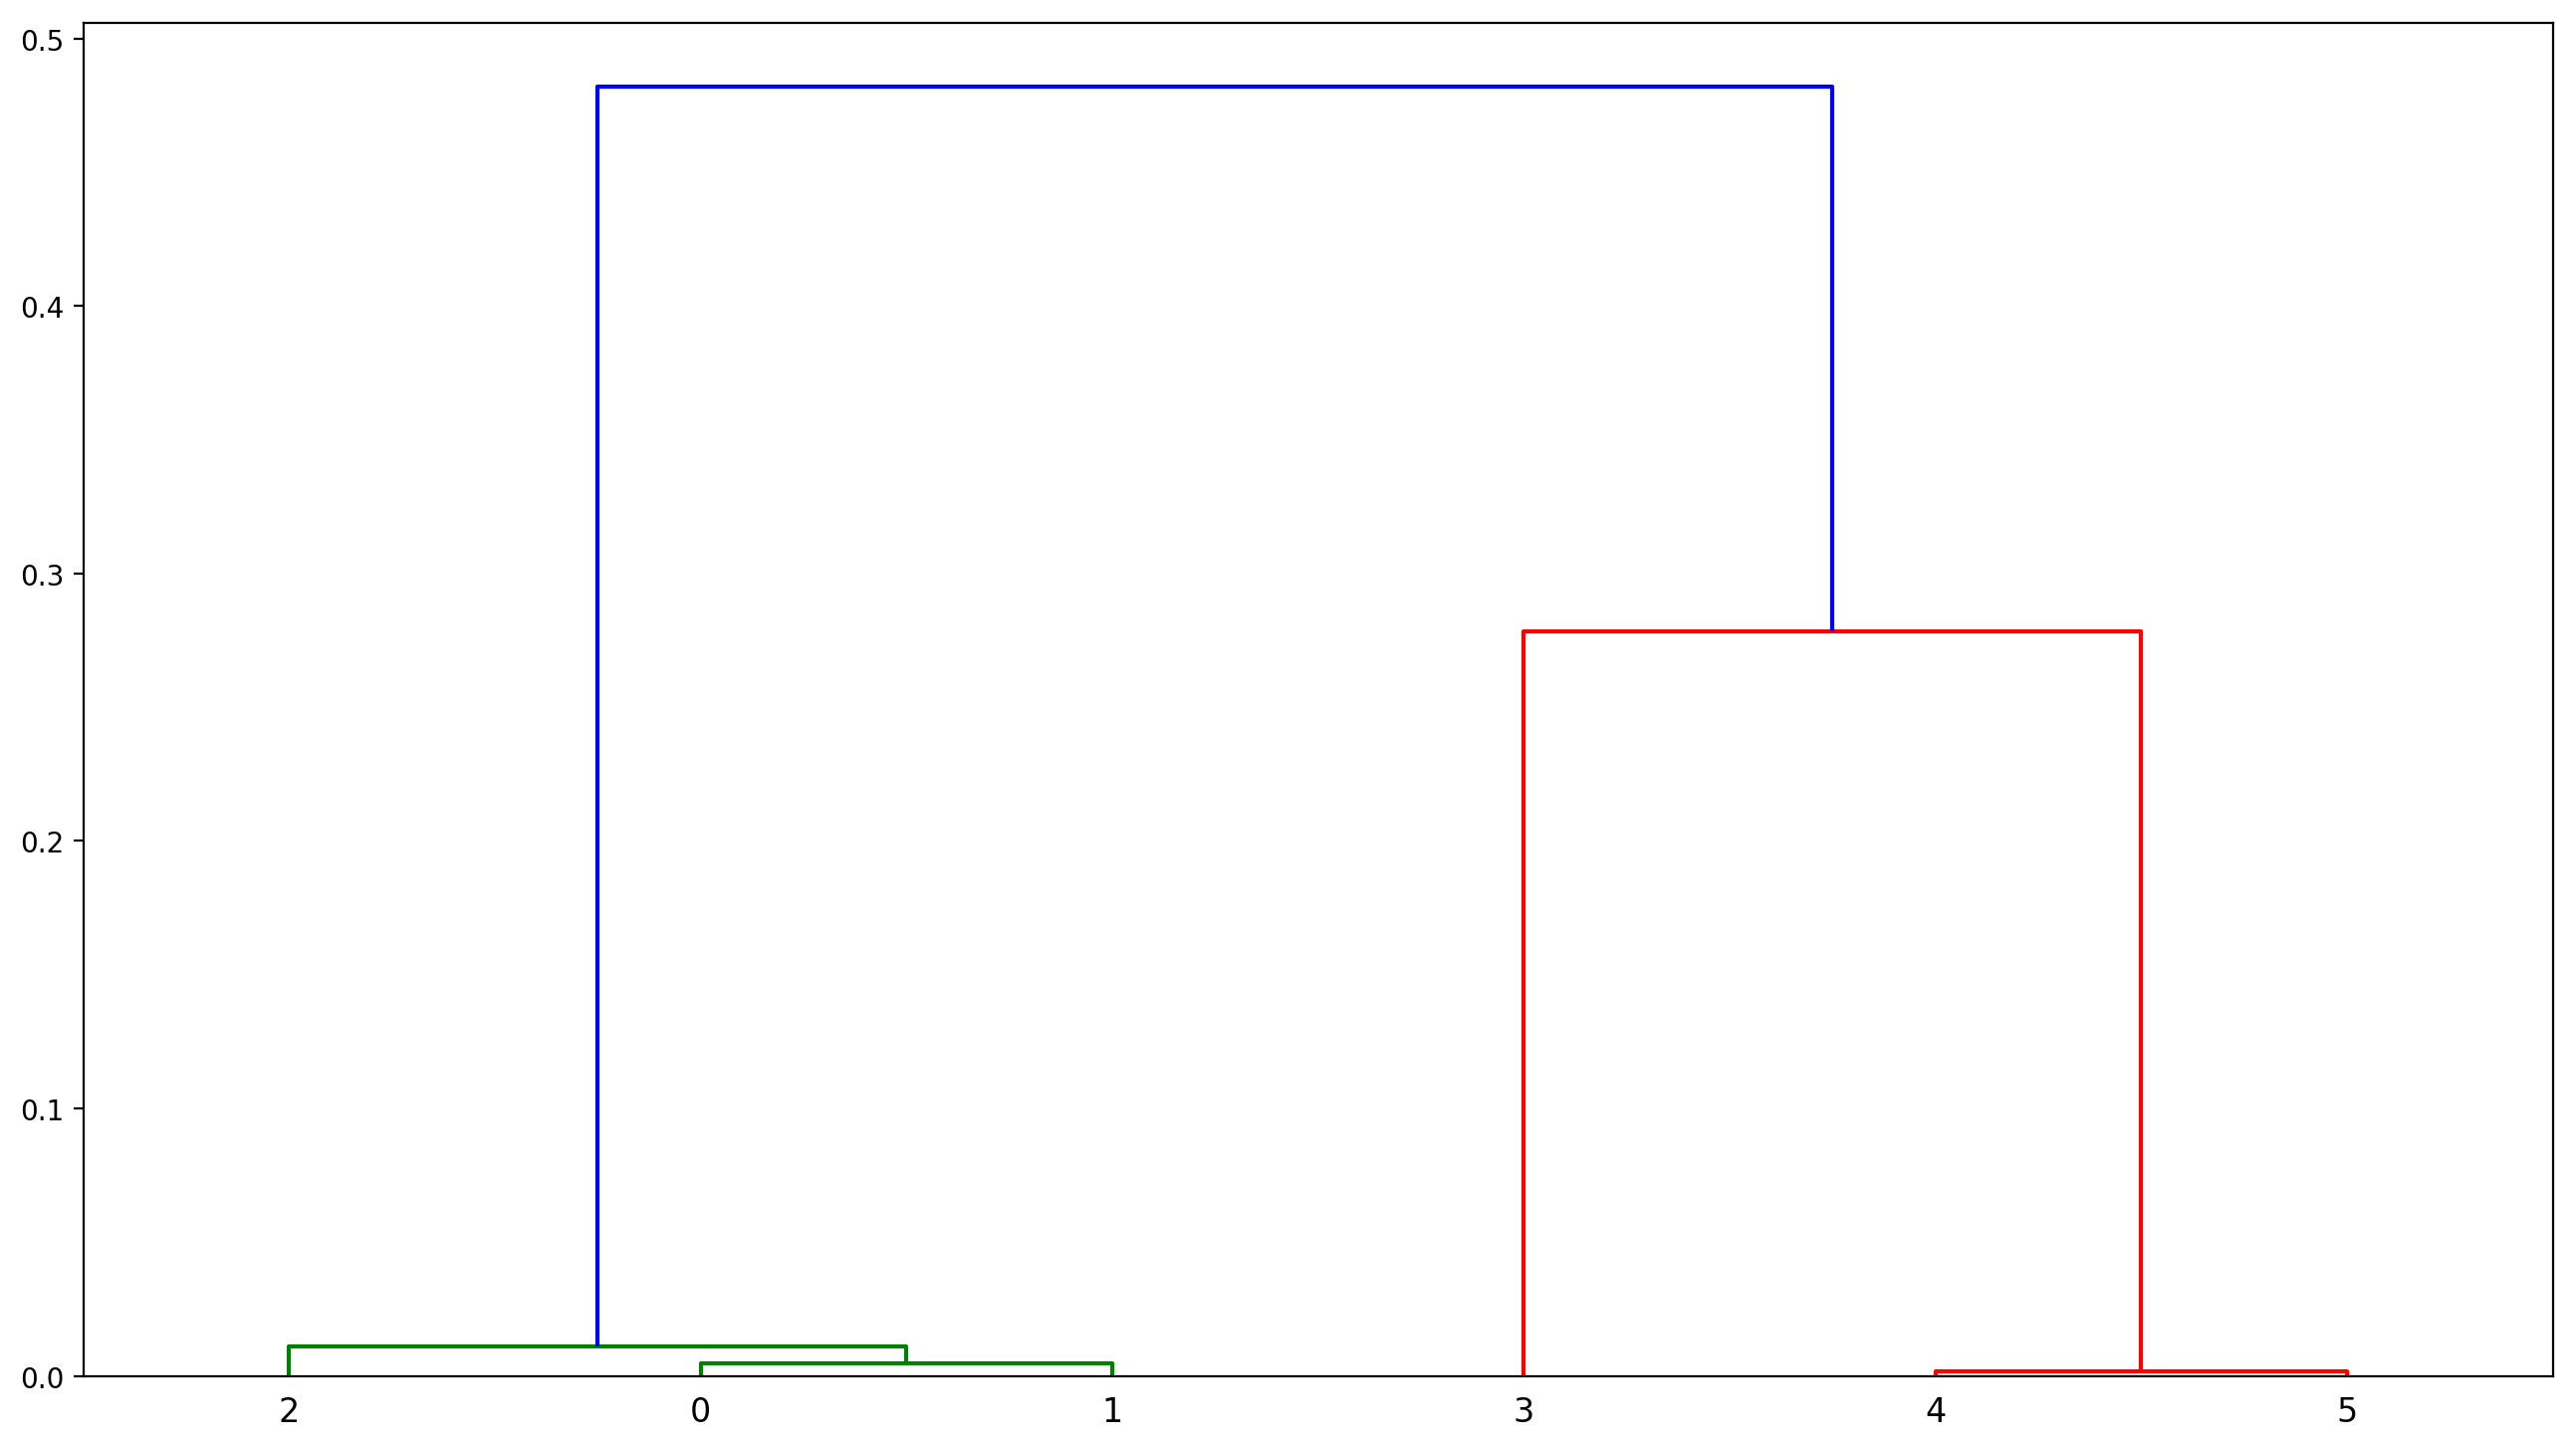

In [438]:
tpm_t = tpm.iloc[:, 6:12].T
linkage_result = linkage(tpm_t, method='average', metric='correlation')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result)
plt.show()

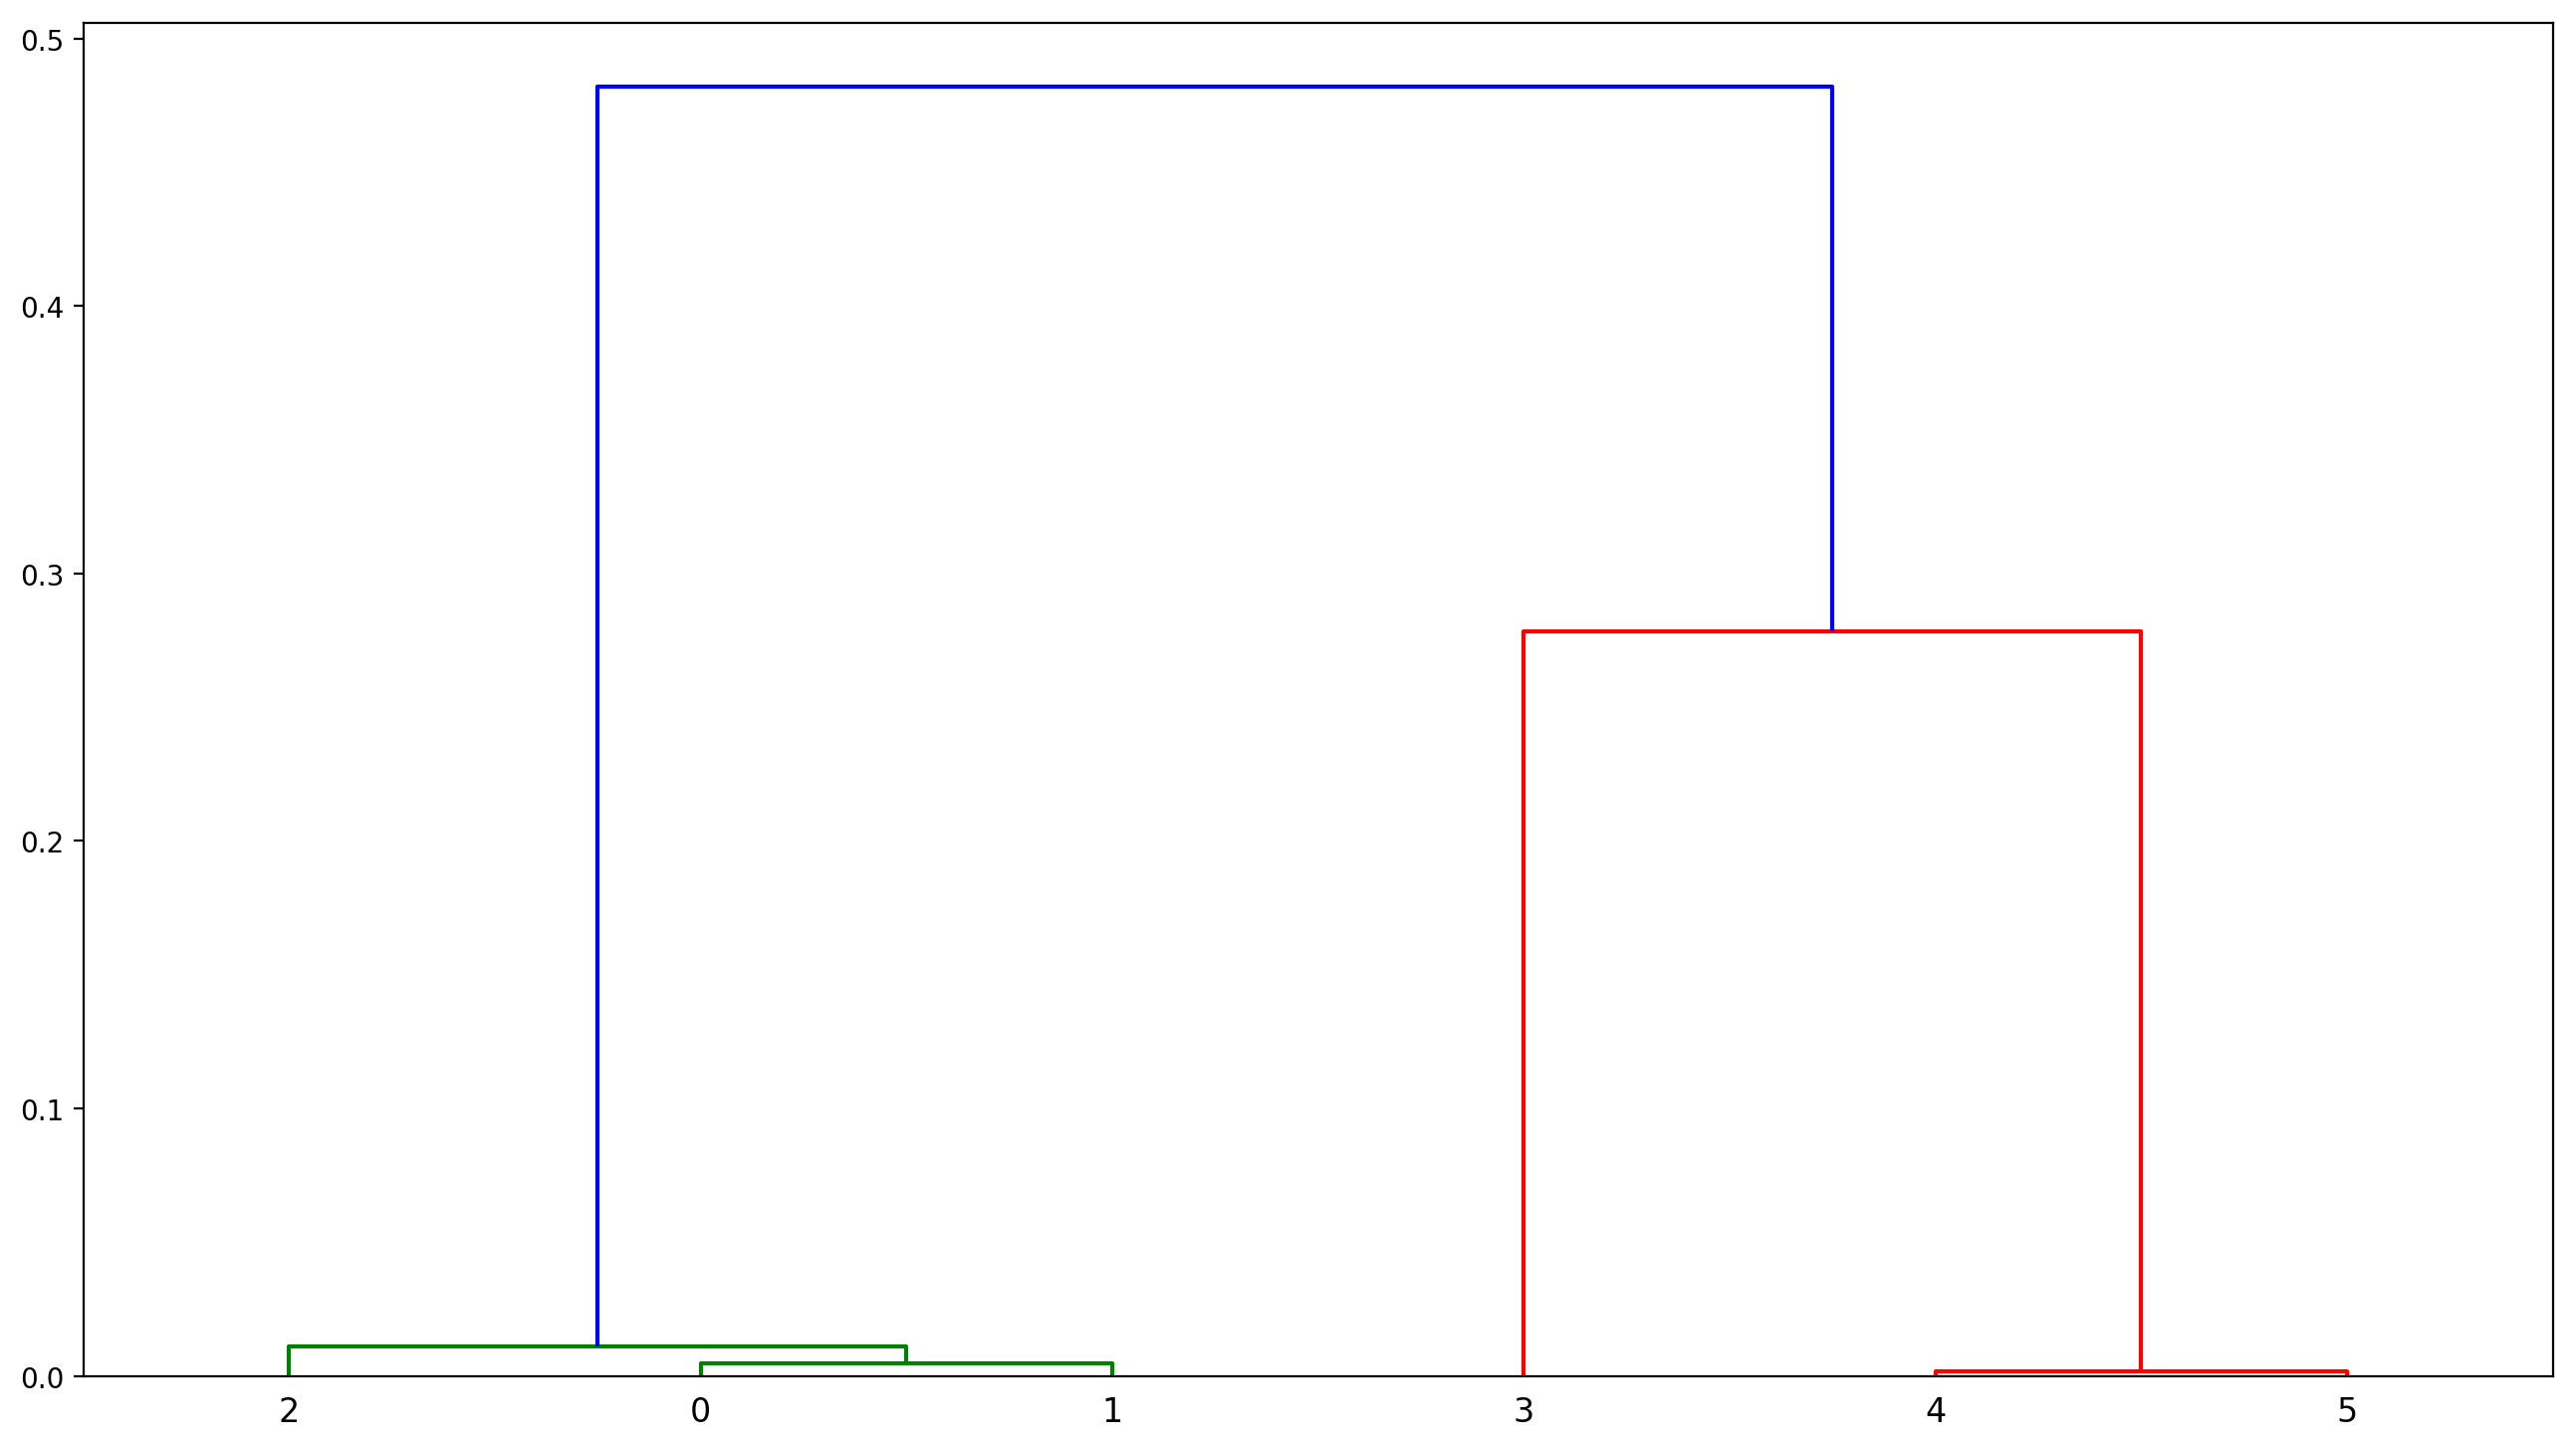

In [437]:
fpkm_t = fpkm.iloc[:, 6:12].T
linkage_result = linkage(fpkm_t, method='average', metric='correlation')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result)
plt.show()

In [375]:
linkage?